# 12-752: Data-Driven Building Energy Management
## Fall 2016, Carnegie Mellon University

## Assignment \#3

We will begin by unpickling the dataset containing the loadCurves that we had used in Assignment \#2. 

But first, as always, we will load most modules we will be using:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

%matplotlib inline

Now let's load the load curve dataset:

In [3]:
pkf = open('/Users/Raafe/Desktop/DataDriven/Homework/Homework3/loadCurves.pkl','rb')
data,loadCurves = pickle.load(pkf)
pkf.close()

Because the dataset we have is not sufficient to run an interesting regression task, we will also load a temperature dataset which shows 5-minute interval temperatures measured on the rooftop of Margaret Morrison at CMU.

You will find this dataset on BlackBoard. Download it and then load it into a new DataFrame called ```temperature```.

In [4]:
f = open('/Users/Raafe/Desktop/DataDriven/Homework/Homework3/temperature.csv')
temp = pd.read_csv(f,sep=',', header='infer', parse_dates=[1])

## Task \#1 [10%]

Create a new DataFrame with the temperature data, and set the index to be the Timestamp.

In [5]:
# Your code goes here
temp_ti=temp.set_index('Timestamp')
temp_ti2=temp.set_index('Timestamp',append=False,drop=False)

Since the power consumption time series has a different sampling frequency, we need to resample the datasets so that they have the same frequency.

## Task \#2 [10%]:

Resample the original ```data``` and ```temperature``` DataFrames to one sample every five minutes. You can use any resampling technique, though an averaging method is probably the most appropriate here.

In [6]:
# Your code goes here...
data_ti=data.set_index('Time',drop=False)
data_ti2=data_ti.resample('5Min').mean()

It may be easier to join both DataFrames into one. Let's do that.

## Task #3 [5%]:

Create a new DataFrame called ```alldata``` which is an inner join of the temperature and power datasets (i.e. the rows of ```aldata``` will be those with a timestamp that is present in both the electric power time series *and* the temperature time series).

For good measure, rename the columns of the resulting DataFrame to make them more descriptive and concise.

In [7]:
# Your code goes here.
temp_ti2.columns=['Time','Temperature']
data_ti3=data_ti2.reset_index()
temp_ti3=temp_ti2.reset_index()
temp_ti4=temp_ti3.drop(temp_ti3.columns[0],axis=1)
alldata=pd.merge(temp_ti2,data_ti2,right_index=True,left_index=True)
alldata2=alldata.reset_index(drop=True)
alldata2.isnull().any()

Time           False
Temperature    False
Value           True
Hour            True
Weekday         True
DayOfYear       True
dtype: bool

Depending on how you answered the previous question, there is a chance that some of the entries of your DataFrame contain *null* values. There is a convenient method for DataFrames called ```isnull()``` which you can use to check this. 

## Task #4 [5%]:

Find out how many *null* values there are in the DataFrame. 

Using your method of choice (e.g., interpolation) fill those values so that they don't exist anymore and make a copy of the resulting DataFrame.

Comment on why these *null* values showed up.


In [8]:
# Your code goes here...
alldata2.isnull().values.sum().sum()

3648

There are 3648 missing values or null values in the dataframe!

Now let's turn our attention to the task of fitting a model for regression. To start, let's visualize the time series and the relationship between them.

In [10]:
alldata3=alldata2.interpolate()
alldata3.isnull().values.sum().sum()

0

## Task \#5 [10%]:

Create a line plot with two separate vertical axes showing the Power and Temperature time series (e.g., one vertical axis for temperature and the other one for power, against a single time axis).

Then create a scatter plot for Power (y-axis) versus Temperature (x-axis).

What can you say about these plots and your data? How does this inform your decision to fit a regression model to predict power consumption?

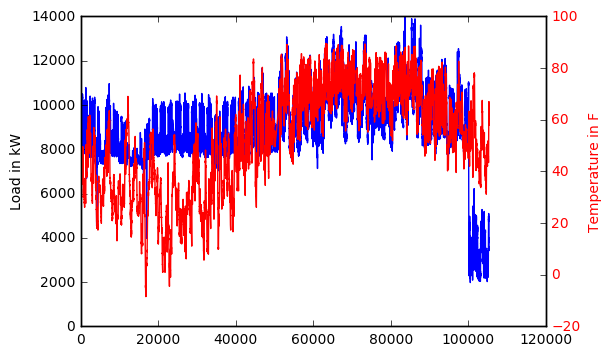

In [12]:
# Your code goes here...
fig=plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(alldata3.Value)
ax1.set_ylabel('Load in kW')

ax2 = ax1.twinx()
ax2.plot(alldata3.Temperature, 'r-')
ax2.set_ylabel('Temperature in F', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
# plt.plot(alldata3.Value)
# plt.plot(alldata3.Temperature)

In [15]:
alldata4=alldata3.drop(alldata3.columns[[0,3,4,5]],axis=1)
# alldata4.isnull().sum().sum()
# alldata4.columns
alldata4.head()

,Temperature,Value
0,54.43,7836.626475
1,54.691,7867.521625
2,54.604,7901.433225
3,54.648,7839.236275
4,54.648,7886.671675


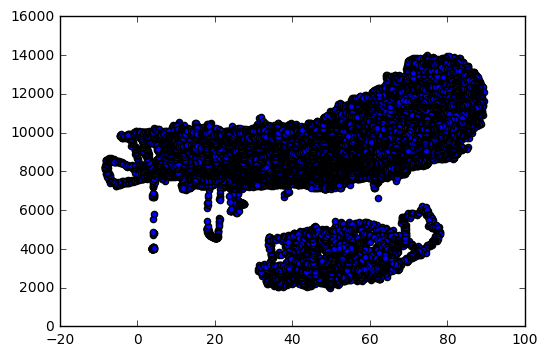

In [14]:
# alldata3.plot(kind='scatter',x='Temperature',y='Value');
# alldata3.plot.scatter(x='Value',y='Temperature',style='o')
# type(alldata3)
alldata4.Temperature=alldata4.Temperature.astype(float)
alldata4.Value=alldata4.Value.astype(float)
# plt.scatter(alldata4.Value, alldata4.Temperature,s=20,c=None)
plt.scatter(alldata4.Temperature, alldata4.Value,s=20,c=None)
# type(alldata3.Value)
# alldata4.plot(kind='scatter',x='Value',y='Temperature')

# Task \#6 [40%]:

Separate the data into the features (X) and the response values (Y). Assume, to start, that the features are 'Hour','Weekday' and 'Temperature'; and that the response values are 'Power'.

**(a: 10%)** Fit a regression tree to the whole dataset. In other words, your fitted tree should be able to predict the power consumption for campus when given the hour of the day, day of the week and temperature for a specific time. Calculate the 

**(b: 20%)** Now, rearrange X and Y such that your response values are no longer scalars, but instead a vector of 1 hour periods (i.e., 12 continguous values at the 5-minute resolution). Using this arrangement, fit another regression tree (multi-output) 

**(c: 5%)** Using 10-fold cross-validation, figure out how to best optimize the performance (score) of your model on the dataset, by tweaking the way you are configuring the features X.

**(d: 5%)** Download the 2015 dataset for the campus power consumption (and temperature), and test the results of your trained model (the best one you found in the previous step on that dataset.

In [9]:
# Your code (lots of it) goes here

In [16]:
alldata4.Temperature=alldata4.Temperature.astype(float)
alldata4.Value=alldata4.Value.astype(float)
alldata3.Temperature=alldata4.Temperature.astype(float)
# alldata4.plot.scatter(alldata4.columns[0],alldata4.columns[1])
# plt.scatter(alldata3.Temperature,alldata4.Value)
# alldata3.dtypes
alldata5=alldata3
alldata5=alldata5.drop(alldata5.index[[105324,105325,105326,105327,105328,105329,105330,105331,105332,105333,105334]])

In [17]:
from sklearn import tree
X=alldata3[['Temperature','Hour','Weekday']]
Y=alldata3[['Value']]
X1=X.as_matrix()
Y1=Y.as_matrix()
X3=alldata5[['Temperature','Hour','Weekday']]
Y3=alldata5[['Value']]
X4=X3.as_matrix()
Y4=Y3.as_matrix()

In [18]:
clf=tree.DecisionTreeRegressor()
clf=clf.fit(X3,Y3)

In [19]:
print(clf.feature_importances_)

[ 0.63371281  0.24072642  0.12556076]


In [20]:
clf.score(X3,Y3)

0.98697494562780785

In [21]:
alldata5.tail()

,Time,Temperature,Value,Hour,Weekday,DayOfYear
105319,2014-11-10 21:35:00,64.91000,3793.177575,21.0,0.0,314.0
105320,2014-11-10 21:40:00,64.63000,3681.642950,21.0,0.0,314.0
105321,2014-11-10 21:45:00,64.41499,3730.836350,21.0,0.0,314.0
105322,2014-11-10 21:50:00,64.20000,3715.271425,21.0,0.0,314.0
105323,2014-11-10 21:55:00,63.98500,3673.727375,21.0,0.0,314.0


In [22]:
X5=X4.reshape((-1,36))
Y5=Y4.reshape((-1,12))

In [23]:
clf1=tree.DecisionTreeRegressor()
clf1=clf1.fit(X5,Y5)
print(clf1.feature_importances_)

[ 0.05020857  0.00864503  0.00424354  0.02957193  0.04396196  0.00502975
  0.02953006  0.00511329  0.00359128  0.03430511  0.00517843  0.0089582
  0.02089204  0.00475219  0.00683391  0.01772327  0.02870272  0.01620738
  0.0369298   0.00311511  0.00493792  0.02768099  0.00174605  0.00226905
  0.04997269  0.00479007  0.00252153  0.04566828  0.00352346  0.03487205
  0.04210466  0.00600231  0.00227248  0.34880565  0.05121029  0.00812893]


In [24]:
print(X5.shape)
print(Y5.shape)

(8777, 36)
(8777, 12)


In [25]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
# X = diabetes.data[:150]
# y = diabetes.target[:150]
lasso = linear_model.Lasso()
print(cross_val_score(lasso, X5, Y5))

//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[-4.5029207   0.43258075  0.17160285]
